# Zambrano Garofalo Junior Vidal

## Minería de Datos (ESPE)

# Librerias

In [1]:
'''librerias a usar'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

In [2]:
'''Importacion del data set'''
data = pd.read_csv('data_act_01.csv', sep=';')
'''Impresión del csv'''
data.sample(3)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
7015,160950449,Homeless Complaint,2016-04-04T00:00:00,6:25,2016-04-04T06:25:00,CIT,500 Block Of Eddy St,San Francisco,CA,1,NaN,Premise Address
3526,160932133,Fight No Weapon,2016-04-02T00:00:00,14:59,2016-04-02T14:59:00,CAN,100 Block Of Navy Rd,San Francisco,CA,1,NaN,Premise Address
2361,160930073,Suspicious Person,2016-04-02T00:00:00,0:28,2016-04-02T00:28:00,HAN,3rd St/townsend St,San Francisco,CA,1,NaN,Intersection


In [3]:
'''Información Global de los datos'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CrimeId                10051 non-null  int64  
 1   OriginalCrimeTypeName  10051 non-null  object 
 2   OffenseDate            10051 non-null  object 
 3   CallTime               10051 non-null  object 
 4   CallDateTime           10051 non-null  object 
 5   Disposition            10051 non-null  object 
 6   Address                10051 non-null  object 
 7   City                   9730 non-null   object 
 8   State                  10048 non-null  object 
 9   AgencyId               10051 non-null  object 
 10  Range                  0 non-null      float64
 11  AddressType            10051 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 942.4+ KB


# Datos null

In [4]:
'''Conteo general de datos null'''
data.isnull().sum()

CrimeId                      0
OriginalCrimeTypeName        0
OffenseDate                  0
CallTime                     0
CallDateTime                 0
Disposition                  0
Address                      0
City                       321
State                        3
AgencyId                     0
Range                    10051
AddressType                  0
dtype: int64

In [5]:
'''El determinar que la columna Range posee 10051 datos null y la muestra es de 10051 datos, se procede a eliminarla toda'''
data = data.drop(['Range'], axis=1)
data.sample(3)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
4912,160940623,Noise Nuisance,2016-04-03T00:00:00,4:54,2016-04-03T04:54:00,ADV,2000 Block Of Silver Av,San Francisco,CA,1,Premise Address
1184,160922068,Passing Call,2016-04-01T00:00:00,14:44,2016-04-01T14:44:00,Not recorded,1700 Block Of Sunnydale Av,San Francisco,CA,1,Common Location
9475,160961774,Live Band,2016-04-05T00:00:00,12:48,2016-04-05T12:48:00,ND,1000 Block Of Market St,San Francisco,CA,1,Premise Address


In [6]:
'''Trabajar solo con datos que no contengan NULL'''
data = data.dropna()
data.sample(3)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
4966,160940742,Audible Alarm,2016-04-03T00:00:00,6:39,2016-04-03T06:39:00,HAN,200 Block Of Ellis St,San Francisco,CA,1,Premise Address
3166,160931514,Traffic Stop,2016-04-02T00:00:00,12:05,2016-04-02T12:05:00,HAN,Mission St/26th St,San Francisco,CA,1,Intersection
1925,160923402,909,2016-04-01T00:00:00,20:38,2016-04-01T20:38:00,GOA,0 Block Of Powell St,San Francisco,CA,1,Premise Address


In [7]:
'''Comprobación que no existen null'''
data.isnull().sum()

CrimeId                  0
OriginalCrimeTypeName    0
OffenseDate              0
CallTime                 0
CallDateTime             0
Disposition              0
Address                  0
City                     0
State                    0
AgencyId                 0
AddressType              0
dtype: int64

# Datos duplicados

In [8]:
'''Determinar en la sección CrimeId, si existen duplicados, dado que es un Id unico, no debería'''
aux = data['CrimeId']
saux = pd.Series(aux)
saux.value_counts()

160950496    3
160913455    3
160943709    1
160943698    1
160943699    1
            ..
160931810    1
160931811    1
160931812    1
160931813    1
160964249    1
Name: CrimeId, Length: 9725, dtype: int64

In [9]:
'''Al comprobar que si existen registro duplicados, se eliminan.'''
data['CrimeId'].duplicated().sum()
data.drop_duplicates(inplace=True)
data.sample(3)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
8935,160954004,Suspicious Person,2016-04-04T00:00:00,22:37,2016-04-04T22:37:00,HAN,Turk St/leavenworth St,San Francisco,CA,1,Intersection
4060,160933109,Stolen Vehicle,2016-04-02T00:00:00,19:24,2016-04-02T19:24:00,REP,Howard St/steuart St,San Francisco,CA,1,Intersection
3135,160931462,Fight No Weapon,2016-04-02T00:00:00,11:50,2016-04-02T11:50:00,HAN,King St/3rd St,San Francisco,CA,1,Intersection


# Datos redundante

In [10]:
'''Al determinar que existen 2 columnas que muestran información sobre fecha y hora; se determina mantener "CallDateTime"'''
data = data.drop(['OffenseDate'], axis=1)
data = data.drop(['CallTime'], axis=1)
data.sample(3)

,CrimeId,OriginalCrimeTypeName,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
4309,160933646,22500e,2016-04-02T22:07:00,CIT,1300 Block Of 15th Av,San Francisco,CA,1,Premise Address
48,160913813,415,2016-03-31T22:48:00,GOA,600 Block Of Dolores St,San Francisco,CA,1,Common Location
7413,160951123,Well Being Check,2016-04-04T10:03:00,GOA,Montgomery St/pine St,San Francisco,CA,1,Intersection


# Datos incoherentes

### OriginalCrimeTypeName

In [11]:
'''En la columna de Disposition, se detalla 1 registro no coherente a la teoría del mismo'''
data.groupby('OriginalCrimeTypeName').size()

OriginalCrimeTypeName
***901 Req***     1
**Tazer**         1
*909*             1
.25/500e          2
.52               1
                 ..
Wz               12
X                17
X 594             1
Yelling           3
`Drugs            1
Length: 575, dtype: int64

In [12]:
'''Estandarizamos en OriginalCrimeTypeName'''
data['OriginalCrimeTypeName'] = data['OriginalCrimeTypeName'].replace({'***901 Req***': '901 Req',
                        '**Tazer**': 'Tazer',
                        '*909*': '909',
                        '.25/500e':'25/500e',
                        '.52':'52',
                        '`Drugs':'Drugs',
                        'Fi**expedite**':'Fi expedite ',
                        'Verbal':'Verbals',
                        'Vendors':'Vendor',
                        'Suspects':'Suspect',
                        'Stattic':'Static',
                        'Sleepers':'Sleeper',
                        'Rept':'Report',
                        'R.o. Violation':'R/o Violation',
                        'Pay':'Pay Dispute',
                        'Pay Dis':'Pay Dispute',
                        'Pay Disp':'Pay Dispute',
                        'Npa':'Npat',
                        'Nabors':'Nabor',
                        'Nabo':'Nabor',
                        'Mal':'Male',
                        'Mace':'Maced',
                        'J/o':'Jo',
                        'Jjp':'Jo',
                        'H/r':'H&r',
                        'Fire':'Fireworks',
                        'Encampent':'Encampment',
                        'Encampments':'Encampment',
                        'Drp':'Drop',
                        'Dp':'Drop',
                        'Child':'Children',
                        'Casers':'Caser',
                        'Camp':'Camper',
                        'Campers':'Camper',
                        'Bart':'Bat',
                        'Attempt':'Attemp',
                        'Aggressive':'Agressive',
                        'Aggressive 601':'Agressive',
                        'X':'Other case',
                        'X 594':'Other case',
                        '100v':'Other case',
                        '148':'Other case',
                        '152':'Other case',
                        '152 Jo':'Jo',
                        'Wireless-H/u':'Other case',
                        'Wreckless Driver':'Other case',
                        'Wireless-Open':'Other case'})

<AxesSubplot:title={'center':'Tipos de Crimenes'}>

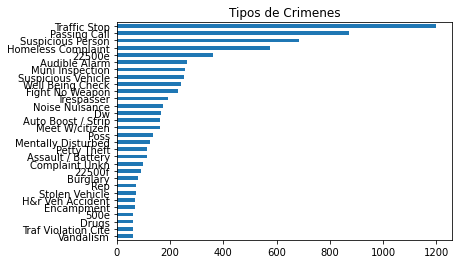

In [24]:
'''Se expresa que el 50% de las categorías de OriginalCrimeTypeName están basados en 9 altos casos y el restante en 42 casos diferentes'''
data['OriginalCrimeTypeName'].value_counts().iloc[:30].sort_values().plot(kind="barh", title = "Tipos de Crimenes")

In [14]:
'''En la columna de Disposition, se detalla 1 registro no coherente a la teoría del mismo'''
aux = data['OriginalCrimeTypeName']
saux = pd.Series(aux)
saux.value_counts()

Traffic Stop          1198
Passing Call           871
Suspicious Person      683
Homeless Complaint     576
22500e                 359
                      ... 
Casing/852               1
Poss 800                 1
Tree Bark                1
Poss 207                 1
Adv To Co A              1
Name: OriginalCrimeTypeName, Length: 535, dtype: int64

# Datos desubicados

### Disposition

In [15]:
'''En la columna de Disposition, se detalla 1 registro no coherente a la teoría del mismo'''
data.groupby('Disposition').size()

Disposition
22                77
ABA               97
ADM               46
ADV             1129
ARR               65
CAN              353
CIT             1406
CRT                2
GOA             1272
HAN             2589
INC               17
NCR               82
ND               423
NOM              324
Not recorded     496
PAS              170
REP              797
SFD                1
UTL              383
dtype: int64

In [16]:
'''Siendo Disposition el estado actual de un arresto 22 no encaja con los demas datos'''
data['Disposition'] = data['Disposition'].replace('22','Not recorded')
data['Disposition'] = data['Disposition'].replace('Not recorded','NR')
data.groupby('Disposition').size()

Disposition
ABA      97
ADM      46
ADV    1129
ARR      65
CAN     353
CIT    1406
CRT       2
GOA    1272
HAN    2589
INC      17
NCR      82
ND      423
NOM     324
NR      573
PAS     170
REP     797
SFD       1
UTL     383
dtype: int64

# Datos con jergas 

### City

In [17]:
'''En la columna de City, se detalla 1 registro no coherente a la mayoria de su escritura'''
data.groupby('City').size()

City
Brisbane            1
Daly City           5
Presidio            3
SAN FRANCISCO       1
San Francisco    9665
Treasure Isla      51
Yerba Buena         3
dtype: int64

In [18]:
'''Aplicación de reemplazo en city'''
data['City'] = data['City'].replace('SAN FRANCISCO','San Francisco')
data['City'] = data['City'].replace('Yerba Buena','San Francisco')
data.groupby('City').size()

City
Brisbane            1
Daly City           5
Presidio            3
San Francisco    9669
Treasure Isla      51
dtype: int64

### AddressType

In [19]:
'''En la columna de AddressType, se detalla 1 registro no coherente a la mayoria de su escritura'''
data.groupby('AddressType').size()

AddressType
Common Location     817
Geo-Override        151
Intersection       3701
Intersectioon         1
Premise Address    5059
dtype: int64

In [20]:
'''Aplicación de reemplazo en AddressType'''
data['AddressType'] = data['AddressType'].replace('Intersectioon','Intersection')
data.groupby('AddressType').size()

AddressType
Common Location     817
Geo-Override        151
Intersection       3702
Premise Address    5059
dtype: int64

# Datos a JSON

In [21]:
'''Exportación de datos a csv'''
data.to_csv('data_cleaning.csv', sep=',', index=False, header=True)
'''Exportación de datos a json'''
data.to_json('data_cleaning.json', orient='records', lines=True)
'''Lectura de JSON'''
data_json = pd.read_json("data_cleaning.json", orient='records', lines=True)
data_json

,CrimeId,OriginalCrimeTypeName,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...
9724,160964210,Well Being Check,2016-04-05T23:38:00,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
9725,160964216,Traffic Stop,2016-04-05T23:43:00,ADV,California St/mason St,San Francisco,CA,1,Intersection
9726,160964227,Traffic Stop,2016-04-05T23:48:00,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
9727,160964229,Passing Call,2016-04-05T23:48:00,NR,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override
